# 激活函數(Activation function)

![](img/neural network_1.jpg)

上圖為一個input為x1、x2並將每個input各自向後傳到三個節點然後ouput，y1、y2的感知器

在每一個節點向後傳遞之前，先將其加總數值通過一個激活函數，再向後傳遞

有了激活函數就可以決定每個節點的重要性，來決定這個節點所要輸出的結果，而中間的節點又叫做神經元

以公式表示第一層(input到下一層)，第一個神經元輸入=x1w11+x2w21，第二個神經元輸入=x1w12+x2w22，第三個神經元輸入=x1w13+x2w23

然後將輸入加上bias通過激活函數，第一個神經元輸入 = x1w11 + x2w21 + bias1，第一個神經元輸出 = f(x1w11 + x2w21 + bias1)

最後乘上權重將結果輸出至output，y1 = 第一個神經元輸出*w'11 + 第二個神經元輸出*w'21 + 第一個神經元輸出*w'31

(w11為第一層到第二層的權重，前面的數字代表連接第一個input，後面的數字代表連接第一個神經元)

(w'11為第二層到第三層的權重，前面的數字代表連接第一個神經元的output，後面的數字代表連接第一個output)

# Sigmoid

所有神經元輸出會被限制在0~1之間，計算量較大，容易出現梯度消失問題，平均不為0

均值不為零 : 造成反向傳播時總是往正或負的方向更新，收斂較慢

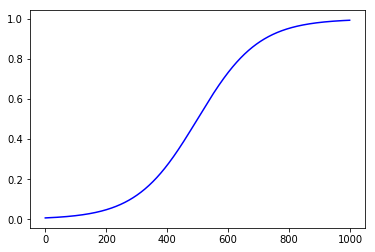

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-5, 5, 1000)
y = sigmoid(x)

plt.plot(y, color="blue")
plt.show()

# Tanh

所有神經元輸出會被限制在-1 ~ 1之間，解決均值不為0的問題，特徵明顯時效果較好

存在梯度消失、計算量大的問題

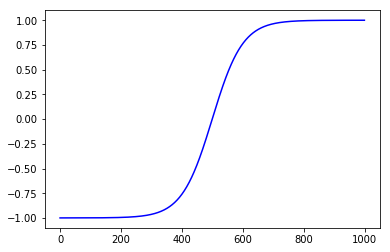

In [3]:
def tanh(x):
    return np.tanh(x)

x = np.linspace(-5, 5, 1000)
y = tanh(x)

plt.plot(y, color="blue")
plt.show()

# Relu

收斂快，容易train不起來，沒有梯度消失問題，可能有神經元永遠不被激活問題

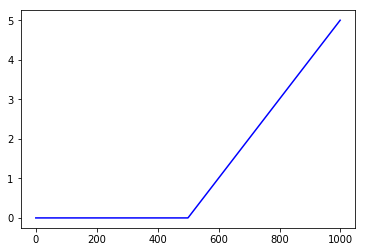

In [13]:
def relu(x):
    return np.maximum(0, x)

x = np.linspace(-5, 5, 1000)
x = x.reshape(1000, 1)
y = relu(x)

plt.plot(y, color="blue")
plt.show()

# Softmax

用於分類，所有輸出總合為1，輸出為該類別的機率

In [5]:
def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x - c)   # 防止浮點數運算時溢位
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    
    return y

x = np.array([1010, 1000, 990])
y = softmax(x)

print("各類別機率", y)
print("總和", np.sum(y))

各類別機率 [9.99954600e-01 4.53978686e-05 2.06106005e-09]
總和 1.0


# 梯度消失

sigmoid的梯度最多只有0.25，在反向傳播時需要由鏈式法則相乘將之前的導數相乘，網路太深相乘結果容易接近0

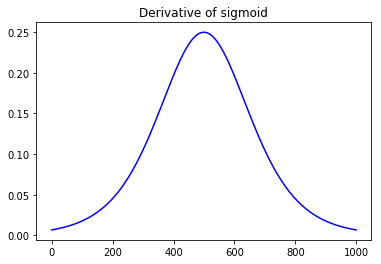

In [12]:
def derivative_sigmoid(x):
    return  sigmoid(x) * (1-sigmoid(x))

x = np.linspace(-5, 5, 1000)
y = derivative_sigmoid(x)

plt.title("Derivative of sigmoid")
plt.plot(y, color="blue")
plt.show()

tanh梯度

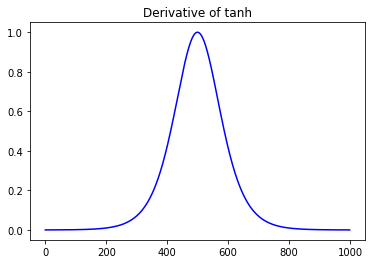

In [14]:
def derivative_tanh(x):
    return  1 / np.cosh(x) **2

x = np.linspace(-5, 5, 1000)
y = derivative_tanh(x)

plt.title("Derivative of tanh")
plt.plot(y, color="blue")
plt.show()

relu梯度

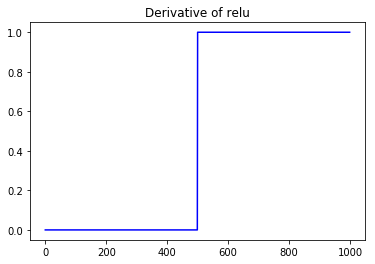

In [16]:
def derivative_relu(x):
    x = np.maximum(0, x)
    x[x>0] = 1
    return  x

x = np.linspace(-5, 5, 1000)
y = derivative_relu(x)

plt.title("Derivative of relu")
plt.plot(y, color="blue")
plt.show()

其他還有Leakly ReLU、ELU、LReLU、PReLU、RReLU、softsign等激活函數

有興趣可以自行搜尋，不常用到在這裡不多詳解